# 20160044 Shin Dong-Ha Assignment11
# Github Link : https://github.com/sinwindis/Assignment11

DEFINE FUNCTION: makeXhat


Generated Matrix
$$AX = B$$
$$A = [x_1, x_2, \dots, x_{p}]$$
$$X^T = [\theta_1, \theta_2, \dots, \theta_{p}]$$
$$B = Original Image$$
$$\hat{X} = (A^TA)^{-1}A^TB$$

Returned Value
$$\hat{X}$$

In [4]:
def makeXhat():

    A = im_noise
    B = im_gray
    

    Xhat = lstsq(A, B, rcond=None)
    #Xhat = np.matmul(np.matmul(inv(np.matmul(np.transpose(A), A)), np.transpose(A)), B)
    
    #Xhat = np.matmul(np.matmul(np.transpose(A), inv(np.matmul(A, np.transpose(A)))), B)
    
    return Xhat[0]

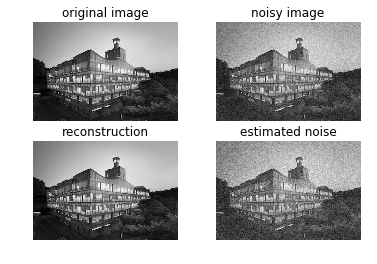

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage import io, color
from skimage import exposure
from numpy.linalg import lstsq

file_image	= 'cau.jpg'

im_color 	= io.imread(file_image)
im_gray  	= color.rgb2gray(im_color)
im          = (im_gray - np.mean(im_gray)) / np.std(im_gray)
(row, col)  = im.shape

noise_std   = 0.2 # try with varying noise standard deviation
noise       = np.random.normal(0, noise_std, (row, col))
im_noise    = im + noise

# obtain the reconstructed (denoised) images with varying degrees of regularization 

im_recon    = np.matmul(im_noise, makeXhat())
noise_recon = im_noise - im_recon
error       = np.linalg.norm(im - im_recon)

p1 = plt.subplot(2,2,1)
p1.set_title('original image')
plt.imshow(im, cmap='gray')
plt.axis('off')

p2 = plt.subplot(2,2,2)
p2.set_title('noisy image')
plt.imshow(im_noise, cmap='gray')
plt.axis('off')

p3 = plt.subplot(2,2,3)
p3.set_title('reconstruction')
plt.imshow(im_recon, cmap='gray')
plt.axis('off')

p4 = plt.subplot(2,2,4)
p4.set_title('estimated noise')
plt.imshow(noise_recon, cmap='gray')
plt.axis('off')

plt.show()